In [320]:
import seaborn as sns
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Numpy:

In [321]:
file_path = 'survey.csv'
data = pd.read_csv(file_path)

# Nur die Spalte 'Age' verwenden und fehlende Werte entfernen
age_data = data['Age'].dropna()

## Histogramm, Boxplot und Stripplot erstellen, um die statischen Daten des Datensatzes zu analysieren:

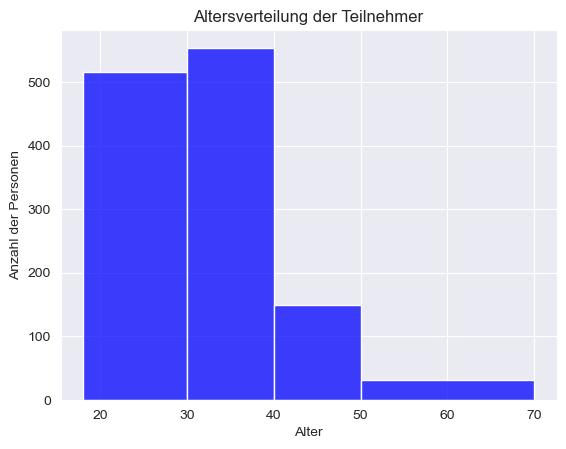

In [322]:
bins = [18, 30, 40, 50, 70]

sns.histplot(age_data, bins=bins, color='blue')

plt.title('Altersverteilung der Teilnehmer')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Personen')

plt.show()

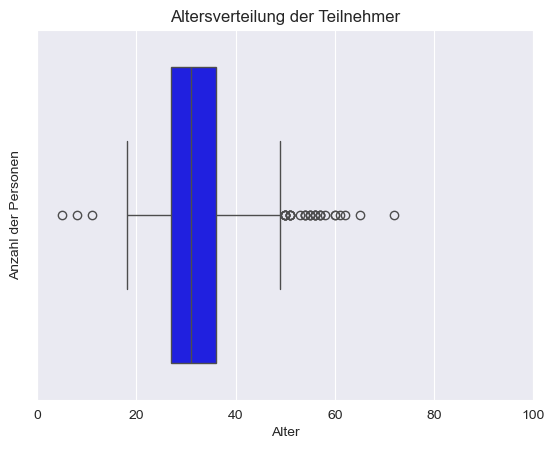

In [323]:
sns.boxplot(x=age_data, color='blue')


plt.title('Altersverteilung der Teilnehmer')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Personen')

plt.xlim(0, 100)

plt.show()

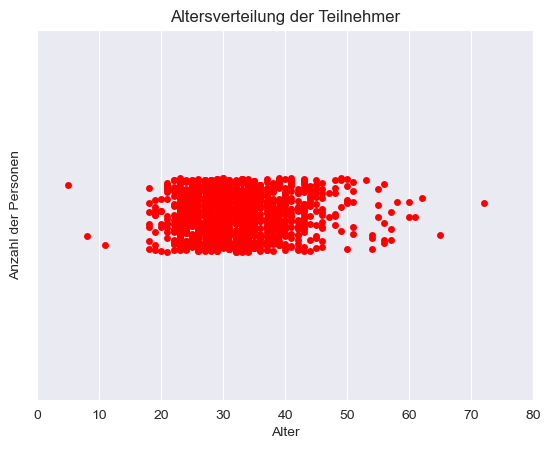

In [324]:
sns.stripplot(x=age_data, color='red', jitter=True)  

plt.title('Altersverteilung der Teilnehmer')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Personen')

plt.xlim(0, 80)

plt.show()

### Sind die Daten homogen verteilt? Gibt es Ausreißer? 
- größtenteils gleichmäßig verteilt
- Ausreißer in beide Richtungen
- wenige unter ca. 18 Jahre
- die meisten zwischen 20 und 40 Jahre
- einige über 50 Jahre
- wenige über 60 Jahre

### Kannst du durch die statistischen Werte schon irgendwelche Schlüsse aus deinen Daten ziehen? 
- Berufstätig
- Außreißer könnten Fehler sein

## Die drei jüngsten und ältesten Teilnehmer ausgeben

In [325]:
lowest_age = age_data.nsmallest(3)
highest_age = age_data.nlargest(3)

print('Drei jüngste Teilnehmer:')
print(lowest_age)

print('Drei älteste Teilnehmer:')
print(highest_age)

Drei jüngste Teilnehmer:
715    -1726
143      -29
1127      -1
Name: Age, dtype: int64
Drei älteste Teilnehmer:
390     99999999999
364             329
1182             72
Name: Age, dtype: int64


In der Ausgabe werden die drei jüngsten und ältesten Teilnehmer angezeigt.
Die jüngsten Teilnehmer sind unter 0 Jahre alt, was nicht möglich ist.
Die älstesten 2 Teilnehmer sind über 300 Jahre alt, was ebenfalls nicht möglich ist.

## Numpy Array mit 1 Spalte erstellen
Die Aufgabe ein NumpyArray mit nur einer Spalte zu erstellen ist für uns nicht möglich, da in unserem Datensatz nur eine Spalte mit Zahlen vorhanden ist


# Pandas:

In [326]:
data_array = pd.read_csv(file_path)
pandas_age_array = data_array.select_dtypes(include=['number'])

print('Pandas Array mit allen Daten: ', data_array)
print('Pandas Array mit numerischen Daten: ', pandas_age_array)

Pandas Array mit allen Daten:                  Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment wo

## statischen Daten des Datensatzes zu analysieren:

In [327]:
print(data_array.describe())
print(data_array.info())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   objec

### Sind die Daten homogen verteilt? Gibt es Ausreißer? 
- Sowohl das minimale als auch das maximale Alter sind sehr unrealistisch
- mean ist 79.428.150
- median ist 31
- Daten sind nicht homogen verteilt
- einige Ausreißer wobei der großteil ein realistisches Alter hat

### Kannst du durch die statistischen Werte schon irgendwelche Schlüsse aus deinen Daten ziehen?
- fehlerhafte Daten
- fehlende Daten


## Die drei jüngsten und ältesten Teilnehmer ausgeben

In [328]:
sorted_data = data_array.sort_values(by='Age')

print("Drei niedrigste Werte:")
print(sorted_data[['Age']].head(3))

print("\nDrei höchste Werte:")
print(sorted_data[['Age']].tail(3))


Drei niedrigste Werte:
       Age
715  -1726
143    -29
1127    -1

Drei höchste Werte:
              Age
1182           72
364           329
390   99999999999


## Unterschiede zwischen Numpy und Pandas

- Pandas ist für Arrays mit unterschiedlichen Datentypen besser geeignet
- Numpy für Zahlenarrays
- in unserem Fall ist Pandas besser geeignet, da wir nur eine Spalte mit Zahlen haben


In [329]:
print(data_array.iloc[0])

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

## Bedeutung der Spalten
- **Timestamp:** Zeitpunkt der Umfrage
- **Age:** Alter
- **Gender:** Geschlecht (Male, Female, male, female, M, F)
- **Country:** Land
- **state:** Bundesstaat (nur USA, sonst NA)
- **self_employed:** Selbstständig (Yes, No)
- **family_history:** Familiengeschichte von psychischen Erkrankungen (Yes, No)
- **treatment:** in Behandlung (Yes, No)
- **work_interfere:** beeinträchtigt die Arbeit (Often, Rarely, Never, Sometimes)
- **no_employees:** Mitarbeiteranzahl
- **remote_work:** arbeitet außerhalb des Büros (Yes, No)
- **tech_company:** primär technologieorientiertes Unternehmen (Yes, No)
- **benefits:** bietet Leistungen (Yes, No, Don't know)
- **care_options:** mentale Gesundheitsleistungen vom Arbeitgeber (Yes, No, Not sure)
- **wellness_program:** psychische Gesundheit im Wellnessprogramm (Yes, No, Don't know)
- **seek_help:** bietet Arbeitgeber Informationen zur Hilfe (Yes, No, Don't know)
- **anonymity:** Anonymität geschützt bei Behandlung für psychische Erkrankungen oder Drogenmissbrauch(Yes, No, Don't know)
- **leave:** medizinischer Urlaub bei psychischen Erkrankungen (Very easy, Somewhat easy, Don't know, Somewhat difficult, Very difficult)
- **mental_health_consequence:** negative Konsequenzen bei psychischer Erkrankung von Arbeitgeber(Yes, No, Maybe)
- **phys_health_consequence:** negative Konsequenzen bei körperlicher Erkrankung von Arbeitgeber(Yes, No, Maybe)
- **coworkers:** Kollegen über psychische Erkrankung informiert (Yes, No, Some of them)
- **supervisor:** Chef über psychische Erkrankung informiert (Yes, No, Some of them)
- **mental_health_interview:** psychische Erkrankung im Bewerbungsinterview angesprochen (Yes, No, Maybe)
- **phys_health_interview:** körperliche Erkrankung im Bewerbungsinterview angesprochen (Yes, No, Maybe)
- **mental_vs_physical:** Arbeitgeber behandelt psychische und körperliche Erkrankungen gleich (Yes, No, Don't know)
- **obs_consequence:** negative Konsequenzen bei Offenbarung von psychischer Erkrankung im Job gesehen (Yes, No)
- **comments:** Anmerkungen


In [330]:
female = [
    'Female', 'female', 'Trans-female', 'Cis Female', 'F', 'Woman', 'f',
    'Femake', 'woman', 'Female ', 'cis-female/femme', 'Trans woman',
    'Female (trans)', 'Female (cis)', 'femail'
]
male = [
    'M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'something kinda male?',
    'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Guy (-ish) ^_^',
    'male leaning androgynous', 'Male ', 'Man', 'msle', 'Mail', 'cis male',
    'Malr', 'Cis Man', 'ostensibly male, unsure what that really means'
]

neutral = [
    'queer/she/they', 'non-binary', 'Nah', 'Enby', 'fluid', 'Genderqueer',
    'Androgyne', 'Agender', 'Neuter', 'queer'
]

def classify_gender(gender):
    if gender in female:
        return 'female'
    elif gender in male:
        return 'male'
    else:
        return 'neutral'

data_array['Gender_category'] = data_array['Gender'].apply(classify_gender)
print(data_array['Gender_category'].value_counts())

Gender_category
male       995
female     251
neutral     13
Name: count, dtype: int64


# Visualisierung

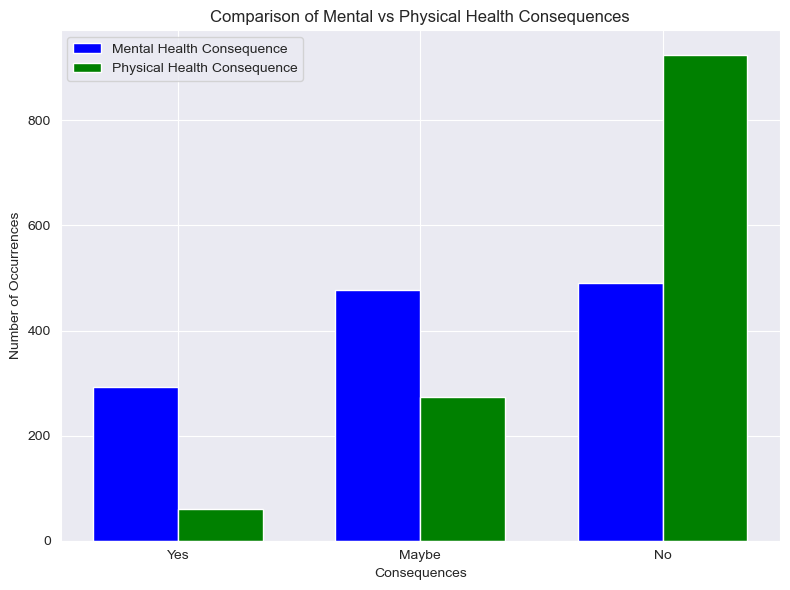

In [331]:
mental_health = data['mental_health_consequence']
phys_health = data['phys_health_consequence']

comparison_df = pd.DataFrame({
    'mental_health': mental_health.value_counts(),
    'phys_health': phys_health.value_counts()
}).reindex(['Yes', 'Maybe', 'No'], fill_value=0)

bar_width = 0.35 
index = range(len(comparison_df))

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(index, comparison_df['mental_health'], bar_width, label='Mental Health Consequence', color='blue')

ax.bar([i + bar_width for i in index], comparison_df['phys_health'], bar_width, label='Physical Health Consequence', color='green')

ax.set_xlabel('Consequences')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Comparison of Mental vs Physical Health Consequences')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(['Yes', 'Maybe', 'No'])
ax.legend()

plt.tight_layout()
plt.show()

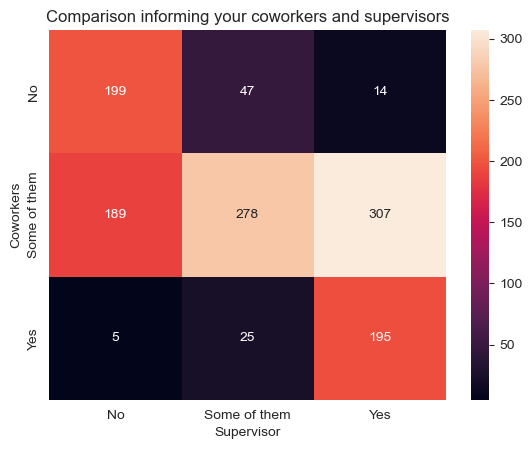

In [332]:
supervisor = data['supervisor']
coworkers = data['coworkers']

heatmap_data = pd.crosstab(coworkers, supervisor)

sns.heatmap(heatmap_data, annot=True, fmt='d')
plt.title('Comparison informing your coworkers and supervisors')
plt.xlabel('Supervisor')
plt.ylabel('Coworkers')
plt.show()

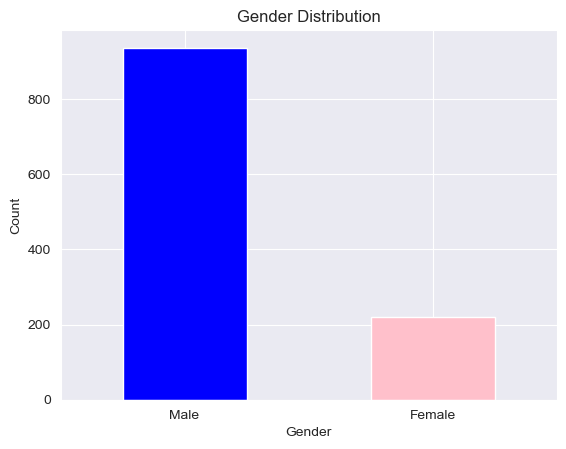

In [333]:
data['Gender'] = data['Gender'].replace(
    {
        'male': 'Male',
        'female': 'Female',
        'M': 'Male',
        'F': 'Female',
        None: 'Unknown'  
    }
)

gender_counts = data['Gender'].value_counts()
gender_counts = gender_counts[gender_counts.index.isin(['Male', 'Female'])]

gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

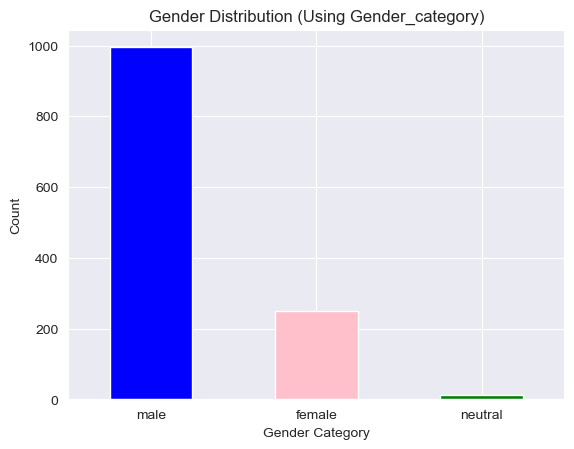

In [334]:
gender_counts = data_array['Gender_category'].value_counts()

# Extract counts for 'male', 'female', and 'neutral'
gender_counts = gender_counts[gender_counts.index.isin(['male', 'female', 'neutral'])]

# Plot the gender distribution
gender_counts.plot(kind='bar', color=['blue', 'pink', 'green'])
plt.title('Gender Distribution (Using Gender_category)')
plt.xlabel('Gender Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


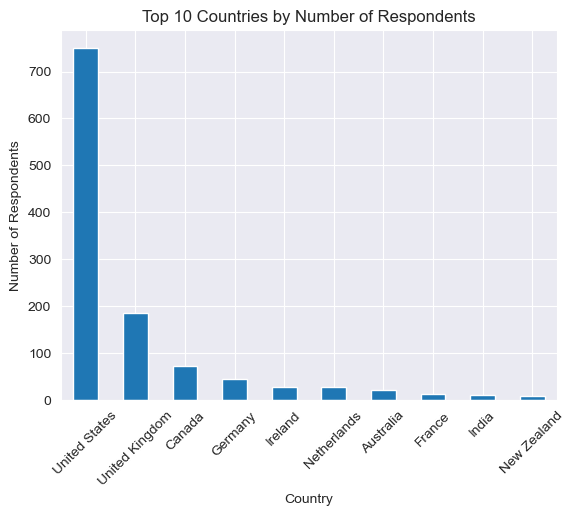

In [335]:
country_counts = data_array['Country'].value_counts()
top_10_countries = country_counts.nlargest(10)

top_10_countries.plot(kind='bar')  

plt.title('Top 10 Countries by Number of Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)

plt.show()

# Aufgabenstellung 3:
### Gibt es in eurem Datensatz Duplikate? Wenn ja, welche?
- Es gibt keine Spalten doppelt oder in einer ähnlichen Form
- In den Zeilen gibt es Werte die gleich sein könnten, jedoch ist das in Ordnung da es unterschiedliche Personen sind

### Gibt es Daten, die nicht relevant sind?
- Die Spalte Comments & Timestamp sind nicht relevant für die Analyse

### Überlegt euch eine Strategie wie ihr mit NAN Werten umgeht. Probiert verschiedene Methoden aus. Wie wirkt sich die Strategie auf euren Datensatz aus?
- work_interfere, self-employed, state, comments können NA sein
- die spalten comments können entfernt werden - comments ist nicht relevant & state ist nur für USA relevant aber kann trotzdem entfernt werden
- die spalten work_interfere, self-employed :(

### Überlegt euch eine Strategie wie ihr mit Ausreißern umgeht. Wie könntet ihr Ausreißer in eurem Datensatz behandeln? Wie viele % sind betroffen? 
- Außreißer kann es nur in der Spalte 'Age' geben, diese Zeilen können entfernt werden

In [336]:
data_array = data_array.drop(columns=['state', 'comments', 'Gender'])
print(data_array)

                Timestamp  Age         Country self_employed family_history  \
0     2014-08-27 11:29:31   37   United States           NaN             No   
1     2014-08-27 11:29:37   44   United States           NaN             No   
2     2014-08-27 11:29:44   32          Canada           NaN             No   
3     2014-08-27 11:29:46   31  United Kingdom           NaN            Yes   
4     2014-08-27 11:30:22   31   United States           NaN             No   
...                   ...  ...             ...           ...            ...   
1254  2015-09-12 11:17:21   26  United Kingdom            No             No   
1255  2015-09-26 01:07:35   32   United States            No            Yes   
1256  2015-11-07 12:36:58   34   United States            No            Yes   
1257  2015-11-30 21:25:06   46   United States            No             No   
1258  2016-02-01 23:04:31   25   United States            No            Yes   

     treatment work_interfere    no_employees remot

In [337]:
data_array = data_array[(data_array['Age'] >= 14) & (data_array['Age'] <= 100)]

sorted_data = data_array.sort_values(by='Age')

print("Drei niedrigste Werte:")
print(sorted_data[['Age']].head(3))

print("\nDrei höchste Werte:")
print(sorted_data[['Age']].tail(3))

Drei niedrigste Werte:
     Age
482   18
93    18
287   18

Drei höchste Werte:
      Age
520    62
560    65
1182   72


In [338]:
data_array['work_interfere'] = data_array['work_interfere'].fillna('Sometimes')

print(data_array['work_interfere'].isna().sum())  # 0 wons stimmt

0


In [339]:
data_array['self_employed'] = data_array['self_employed'].fillna('No')
print(data_array['self_employed'].isna().sum())  # 0 wons stimmt

0


# Aufgabenstellung 4:
## Regression
### Welche numerische Werte in deinem Datensatz, die du mit einem Regression Modell vorhersagen kannst?
- Age
### Welche Vorverarbeitungsschritte sind notwendig?
- unwahrscheinliche Werte entfernen (über 100 Jahre, unter 10 Jahre)
- ordinale Kategorien (work_interfere/ leave/ etc.) in numerische Werte kodieren (Very easy → 1, ..., Very difficult → 5)

In [340]:
work_interfere_data = data_array[['work_interfere']]
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
work_interfere_imputed = imputer.fit_transform(work_interfere_data)

categories = [['Unknown', 'Never', 'Rarely', 'Sometimes', 'Often']]

ordinal_encoder = OrdinalEncoder(categories=categories)
work_interfere_encoded = ordinal_encoder.fit_transform(work_interfere_imputed)

data_array['work_interfere_e'] = work_interfere_encoded
#data_array.drop(columns=['work_interfere'], inplace=True)

In [341]:
treatment_data = data_array[['treatment']]

imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
treatment_imputed = imputer.fit_transform(treatment_data)
categories = [['Unknown', 'No', 'Yes']]
ordinal_encoder = OrdinalEncoder(categories=categories)
treatment_encoded = ordinal_encoder.fit_transform(treatment_imputed)
data_array['treatment_e'] = treatment_encoded

#data_array.drop(columns=['treatment'], inplace=True)

In [342]:
print(tabulate(data_array.head(20), headers='keys', tablefmt='grid'))

+----+---------------------+-------+----------------+-----------------+------------------+-------------+------------------+----------------+---------------+----------------+------------+----------------+--------------------+-------------+-------------+--------------------+-----------------------------+---------------------------+--------------+--------------+---------------------------+-------------------------+----------------------+-------------------+-------------------+--------------------+---------------+
|    | Timestamp           |   Age | Country        | self_employed   | family_history   | treatment   | work_interfere   | no_employees   | remote_work   | tech_company   | benefits   | care_options   | wellness_program   | seek_help   | anonymity   | leave              | mental_health_consequence   | phys_health_consequence   | coworkers    | supervisor   | mental_health_interview   | phys_health_interview   | mental_vs_physical   | obs_consequence   | Gender_category   |   wor

### Wie gut funktioniert das Modell? Erläutere was die einzelnen Werte aus der Confusion Matrix bedeuten.
- bei Zeit noch nachholen


## Decision Tree
### Welche Klassen für die Vorhersagen gibt es in deinem Datensatz? Ist dein Datensatz ausgeglichen?
- Treatment
-    
### Welche Vorverarbeitungsschritte sind notwendig?
- SelectKBest
- kategorische Daten encoden

### Wie gut funktioniert das Modell? Erläutere was die einzelnen Werte aus der Confusion Matrix bedeuten. 

Top 3 Selected Features:
Index(['work_interfere_e', 'benefits_Yes', 'care_options_Yes'], dtype='object')
Accuracy with Top 3 Features: 0.66


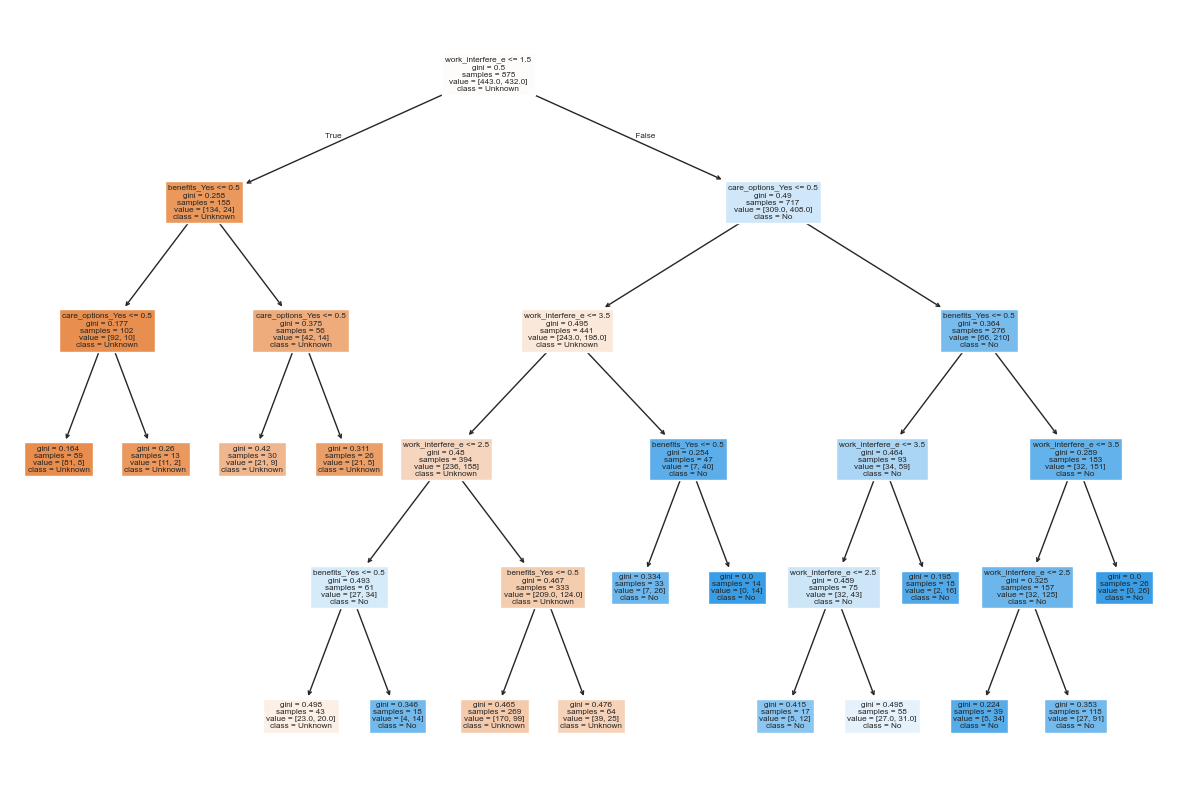

In [343]:
features = data_array[['work_interfere_e', 'remote_work', 'tech_company', 'benefits', 'care_options',
                       'wellness_program', 'seek_help', 'anonymity', 'leave',
                       'mental_health_consequence', 'phys_health_consequence',
                       'coworkers', 'supervisor', 'mental_vs_physical', 'obs_consequence']].copy()

encoded_features = pd.get_dummies(features, drop_first=True)
target = data_array['treatment_e']

selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(encoded_features, target)

selected_features = encoded_features.columns[selector.get_support()]
print("Top 3 Selected Features:")
print(selected_features)

X_train, X_test, y_train, y_test = train_test_split(X_new, target, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Top 3 Features: {accuracy:.2f}")

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=selected_features, class_names=['Unknown', 'No', 'Yes'], filled=True)
plt.show()

# Aufgabe 5:
## Klassifikation mit Decision Tree und Random Forest
### Welches Pre-Tuning ist für deinen Entscheidungsbaum/-wald sinnvoll?
- festlegen der maximalen Tiefe und der maximalen Anzahl der Blätter

### Womit würdest du starten?
- SelectKBest
- Werte für max_depth und max_leaf_nodes festlegen

### Wie gut funktioniert das Modell? Welchen Einfluss haben unterschiedliche Werte beim Pre-Tuning?
- niedrigere Tiefe beugt Overfitting vor
- eingeschränkte Anzahl an Blättern beugt Overfitting vor, aber darf nicht zu klein sein, da sonst zu wenig Daten verfügbar sind

### Hast du noch andere Parameter zum Optimieren von Decision Trees und Random Forest gefunden, die für ein gutes Ergebnis hilfreich sind?
- random_state: zufälliger Startwert, für die reproduzierbarkeit

### Was sind die Unterschiede zwischen den Modellen, die du trainiert hast? 
- der zweite Desicion Tree ist nicht so komplex wie der erste, das bedeutet er ist nicht so anfällig für Overfitting

### Welche Features sind für dein Modell relevant (Feature Importance)? Was passiert, wenn du unwichtige Features weglässt? Hast du dieses Ergebnis erwartet?
- Die Top Features sind: work_interfere_e', 'benefits_Yes', 'care_options_Yes', 'obs_consequence_Yes'
- wenn unwichtige Features weg gelassen werden, wird das Modell weniger anfällig für Overfitting und die Leistung verbessert sich

Top 3 Selected Features:
Index(['work_interfere_e', 'benefits_Yes', 'care_options_Yes',
       'obs_consequence_Yes'],
      dtype='object')
Accuracy with Top 3 Features: 0.68


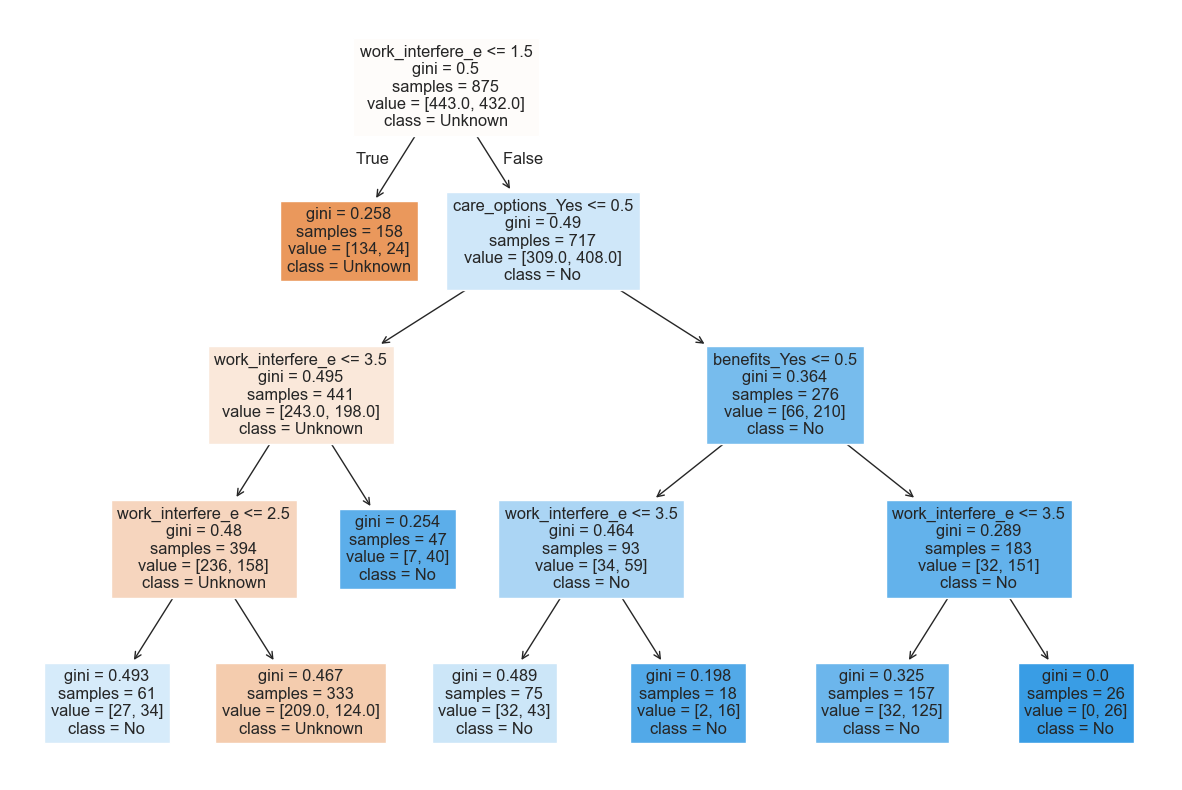

In [344]:
features = data_array[['work_interfere_e', 'remote_work', 'tech_company', 'benefits', 'care_options',
                       'wellness_program', 'seek_help', 'anonymity', 'leave',
                       'mental_health_consequence', 'phys_health_consequence',
                       'coworkers', 'supervisor', 'mental_vs_physical', 'obs_consequence']].copy()

encoded_features = pd.get_dummies(features, drop_first=True)
target = data_array['treatment_e']
selector = SelectKBest(score_func=f_classif, k=4)
X_new = selector.fit_transform(encoded_features, target)

selected_features = encoded_features.columns[selector.get_support()]
print("Top 3 Selected Features:")
print(selected_features)

X_train, X_test, y_train, y_test = train_test_split(X_new, target, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,            
    max_leaf_nodes=8       
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Top 3 Features: {accuracy:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=selected_features, class_names=['Unknown', 'No', 'Yes'], filled=True)
plt.show()


In [345]:
df = data_array.copy()

# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Splitting features and target
X = df.drop(columns=['treatment'])  # Features
y = df['treatment']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", feature_importances.head(10))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       138

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251


Top 10 Important Features:
 treatment_e         0.673965
family_history      0.055926
work_interfere      0.042036
work_interfere_e    0.038638
care_options        0.028486
Timestamp           0.020195
Age                 0.018631
benefits            0.014176
Country             0.012066
leave               0.008546
dtype: float64


## Klassifikation mit KNN 
### Wie schauen deine Daten nach der Skalierung aus?
- Werte sind standartisiert
### Welchen K Wert würdest du zum Starten auswählen?
- 5
### Wie sieht das Ergebnis deines Modelles aus? Wie verändert sich das Ergebnis mit einem anderen K Wert? 
- höchste Genauigkeit mit einem K-Wert von 19 (0.804)

In [346]:
drop_cols = ['Timestamp', 'Gender_category', 'Country', 'Gender_category', 'treatment']
features = data_array.drop(columns=drop_cols)
target = data_array['treatment']

features = pd.get_dummies(features)
label_encoder = LabelEncoder() 
target = label_encoder.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit des Modells mit K={k}: {accuracy:.4f}')

for k in range(1, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'K={k}, Genauigkeit: {accuracy:.4f}')


Genauigkeit des Modells mit K=5: 0.7371
K=1, Genauigkeit: 0.7012
K=3, Genauigkeit: 0.7450
K=5, Genauigkeit: 0.7371
K=7, Genauigkeit: 0.7729
K=9, Genauigkeit: 0.7809
K=11, Genauigkeit: 0.7769
K=13, Genauigkeit: 0.7769
K=15, Genauigkeit: 0.7809
K=17, Genauigkeit: 0.8008
K=19, Genauigkeit: 0.8008


In [347]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled_df.head())
print(X_train_scaled_df.describe())

        Age  work_interfere_e  treatment_e  self_employed_No  \
0 -0.689602          0.420255     1.012073          0.349763   
1 -0.825004         -1.791615     1.012073          0.349763   
2  1.070624          0.420255     1.012073          0.349763   
3  0.258212         -0.685680     1.012073          0.349763   
4 -0.554200          1.526190     1.012073          0.349763   

   self_employed_Yes  family_history_No  family_history_Yes  \
0          -0.349763          -1.261219            1.261219   
1          -0.349763          -1.261219            1.261219   
2          -0.349763          -1.261219            1.261219   
3          -0.349763          -1.261219            1.261219   
4          -0.349763          -1.261219            1.261219   

   work_interfere_Never  work_interfere_Often  work_interfere_Rarely  ...  \
0             -0.468521             -0.353354              -0.388263  ...   
1              2.134375             -0.353354              -0.388263  ...   
2    

## Support Vector Machine
### Musst du bei SVMs eine Skalierung verwenden? Wenn ja, welche ist für dich am sinnvollsten? Probiere es einmal mit und einmal ohne Skalierung!

### Welche Kernel Funktion könntest du für deine Problemstellung ausprobieren? Wie verändert sich dein Ergebnis?

### Verändere den C Wert (Regulazation Parameter) deines Support Vector Classifiers. Dieser Wert definiert, wie hoch der zugelassenen Fehler bei der Suche nach der optimalen Hyperplane ist. Was passiert, wenn du den Wert veränderst?

### Wie schneidet die Support Vector Machine gegenüber den anderen Modellen ab?


## Clustering (K-Means)
Clustering ist eine Methode des Unsupervised Learnings. Verwende Clustering, um Muster in deinen Daten zu finden.

### Wie viele Gruppen denkst du, dass es in deinen Daten gibt? Probiere diesen Wert als ersten Startwert für K.

### Visualisiere die Gruppen, die von K-Means identifiziert wurde anhand zweier Features.